Plano de hoje
-------------

1. Ambiente de programação
2. Usando o computador para calcular    
3. Usando o computador para desenhar
4. Usando o computador para integrar: quadraturas
5. Usando o computador para aproximar: interpolação
    1. Interpolação local
    2. Interpolação de Lagrange
    3. Fenômeno de Runge e pontos de Chebyshev
    4. Transformada de Fourier
    5. **Extrapolação via mínimos quadrados**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Excesso de dados

Já vimos que usar pontos demais para interpolar pode trazer problemas:
ao usar um polinômio de grau muito grande, este pode oscilar demasiadamente;
ao considerar muitos dados com um pouco de erro, este pode ser magnificado pela interpolação.

Entretanto, possuir mais informação deveria nos dar **mais** entendimento sobre o nosso problema, não?
Vamos, aqui, tentar aproveitar estes dados suplementares de outra forma.

In [2]:
def f(x):
    return 1/(1 + x**2)

In [14]:
ts = linspace(-5,5,300)
xs = linspace(-5,5,30)
ys = f(xs)

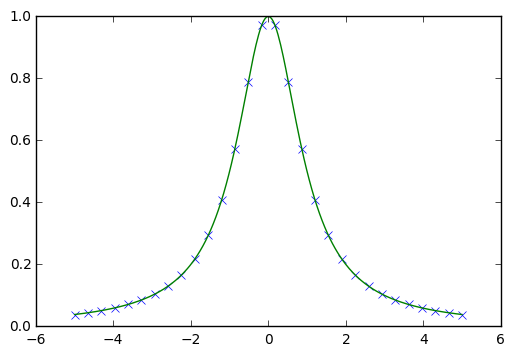

In [15]:
plot(xs, ys, 'x')
plot(ts, f(ts));

# Mínimos quadrados

Em vez de buscarmos um polinômio de grau 29 que aproxime os 30 pontos acima,
vamos tentar algo novo:
gostaríamos de encontrar um polinômio de grau baixo que represente de forma aceitável esta função.
Por exemplo, suponhamos $P$ de grau 6.

O sistema linear $Ac = y$ que obteremos ao escrever as 30 equações $P(x_k) = y_k$ será,
muito provavelmente, impossível.
Temos 30 equações e apenas 7 variáveis para os coeficientes de $P$.
Entretanto, podemos tentar encontrar coeficientes que sejam os "melhores possível"
segundo algum critério.
Um critério bastante comum e prático (ou seja, rápido para o computador executar)
é o de mínimos quadrados:

$$ \text{tomaremos $c$ tal que } \left\| Ac - y \right\| \text{ seja o menor possível.} $$

Para minimizar $\left\| Ac - y \right\|$, vamos minimizar o quadrado, o que torna o problema mais fácil, já que:

$$ \left\| Ac - y \right\|^2 = \langle Ac - y, Ac - y \rangle = c^T (A^T A) c - 2 c^T Ay + y^T y. $$

Derivando em relação a $c$, obtemos as chamadas equações normais:

$$ A^T A c = A^T y,$$

que agora formam um sistema com tantas equações quanto a dimensão de $c$.

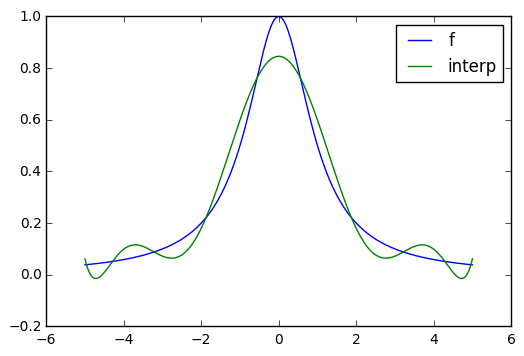

In [6]:
coeff_interp = polyfit(xs, ys, 8)
f_interp = poly1d(coeff_interp)

ts = linspace(-5,5,300)
plot(ts, f(ts), label='f')
plot(ts, f_interp(ts), label='interp')
legend();

Veja que, se usássemos polinômios de grau alto demais, obteríamos erros muito maiores:

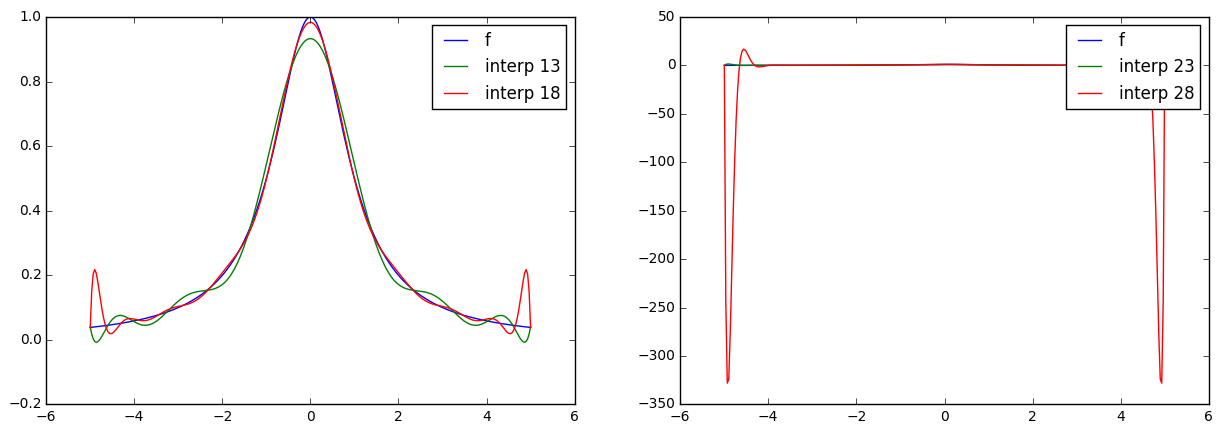

In [7]:
figure(figsize=(15,5))
f_interp13 = polyfit(xs, ys, 13)
f_interp18 = polyfit(xs, ys, 18)
f_interp23 = polyfit(xs, ys, 23)
f_interp28 = polyfit(xs, ys, 28)
subplot(1,2,1)
plot(ts, f(ts), label='f')
plot(ts, polyval(f_interp13, ts), label='interp 13')
plot(ts, polyval(f_interp18, ts), label='interp 18')
legend();

subplot(1,2,2)
plot(ts, f(ts), label='f')
plot(ts, polyval(f_interp23, ts), label='interp 23')
plot(ts, polyval(f_interp28, ts), label='interp 28')
legend();

## Erros nos dados

E o que acontece se tivermos erros nos dados?
Suponhamos que os nossos dados sejam $y_k = f(x_k) + e(x_k)$,
onde $e$ é um pequeno erro.
Se tivermos "muita informação",
talvez sejamos capazes de "eliminar o erro".

In [8]:
from scipy.interpolate import BarycentricInterpolator

In [9]:
def chebyshev_nodes(a,b,n):
    m = (a+b)/2
    h = (b-a)/2
    return m + h*cos(pi*arange(1,2*n,2)/(2*n))

In [10]:
def interp_vs_leastsq(f,e,xs,deg,ts, uselog=False):
    ys = f(xs) + e(xs)
    p_i_l = BarycentricInterpolator(xs, ys)
    f_int = polyfit(xs, ys, deg)

    diff_lagr = p_i_l(ts) - f(ts)
    diff_lstsq = polyval(f_int, ts) - f(ts)
    if uselog:
        semilogy(ts, abs(diff_lagr), label='lagrange')
        semilogy(ts, abs(diff_lstsq), label='grau {}'.format(deg))
    else:
        plot(ts, diff_lagr, label='lagrange')
        plot(ts, diff_lstsq, label='grau {}'.format(deg))
    legend(loc=0)
    err_l = sum(diff_lagr**2)
    err_mq = sum(diff_lstsq**2)
    title('Erro $L^2$: {:.5g} (L), {:.2g} (MQ)'.format(err_l, err_mq))

Vejamos um primeiro exemplo, apenas para ilustrar:

In [11]:
def f(x):
    return x
def e(x):
    return sin(x**2 - 4*x)/100

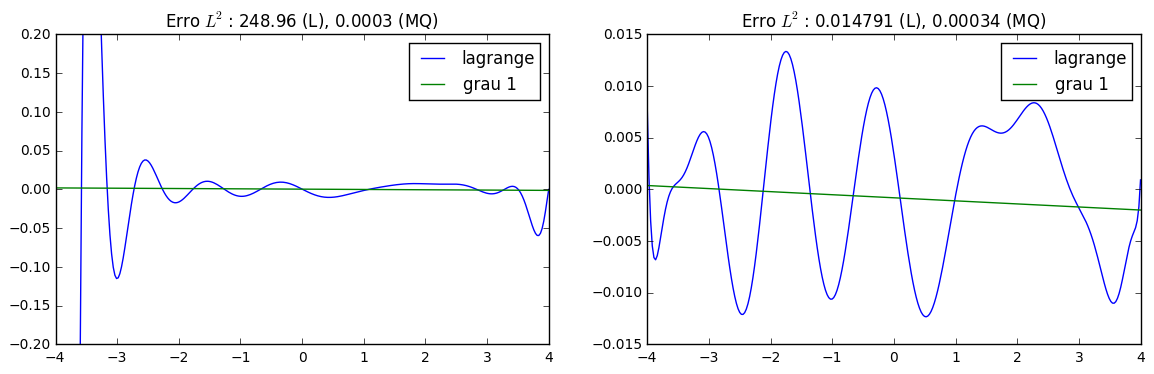

In [12]:
ts = linspace(-4,4,300)

figure(figsize=(14,4))
subplot(1,2,1)
xs = linspace(-4,4,20)
interp_vs_leastsq(f, e , xs, deg=1, ts=ts)
ylim([-.2,.2])

subplot(1,2,2)
xs = chebyshev_nodes(-4,4,20)
interp_vs_leastsq(f, e, xs, deg=1, ts=ts)

Vejamos, agora, um exemplo mais sério.

In [13]:
def f(x):
    return 1/(1 + x**2)
def e(x):
    return random.normal(size=shape(x))/20

### Exercício

O que acontece com o erro de interpolação conforme variamos o grau do polinômio para os mínimos quadrados?

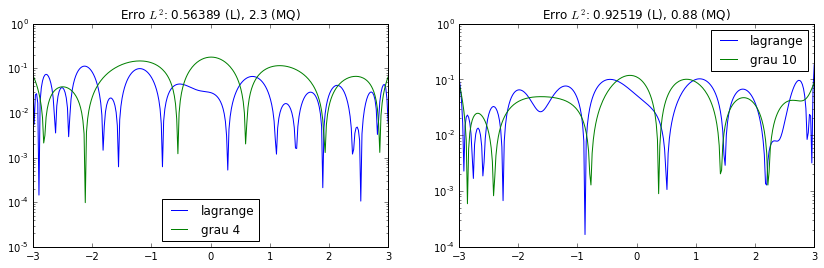

In [24]:
pass

O que acontece se usarmos mais pontos ainda (em vez de 20 pontos de Chebyshev, 200), por exemplo?

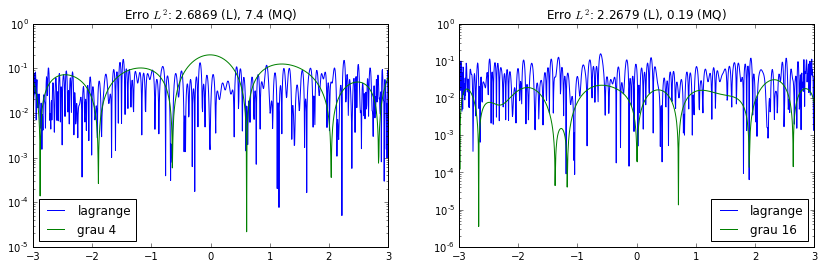

In [25]:
pass

## Erros de extrapolação

Agora, modifique `ts` para efetuar um teste de generalização dos polinômios.

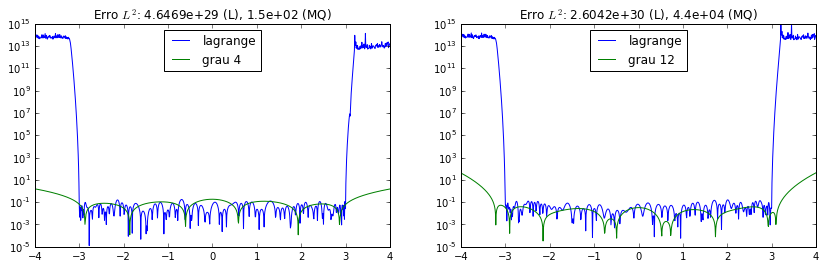

In [26]:
pass

### Exercício

Faça um gráfico das funções no intervalo $[-3, 3]$.

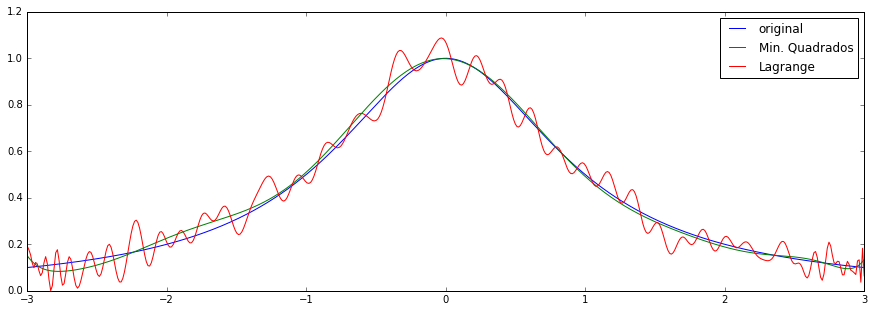

In [27]:
pass